In [1]:
# Change working directory
%cd ..

f:\DS Lab\OT\KPG_GWB


C:\Users\ngtdu\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import numpy as np
import scipy
import os
import ot
from optimal_transport.models import KeypointGW, GW_Barycenter, GW, KPG_RL_GW
from optimal_transport.experiments._experiment import Experiment
from typing import Tuple, Optional, List, Union, Dict
import copy

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
plt.rcParams['figure.dpi'] = 300

plus_minus = u"\u00B1"
algo_id = {"KeypointGW": "KGWB", "KPG_RL_GW": "KGW", "GW_Barycenter": "GWB", "GW": "GW"}

def summarize(exp_name, records: List[Dict], y_axis, gt="usps_test"):
    record_ = copy.deepcopy(records[0])
    if "None" in record_.keys():
        record_["None"] = {k: [] for k in record_["None"]}
    for k, v in record_[exp_name].items():
        record_[exp_name][k] = {k_: [] for k_ in v}

    for record in records:
        if "None" in record_.keys():
            for k in record["None"]:
                record_["None"][k].append(record["None"][k])
        
        for k, v in record[exp_name].items():
            for metric in v.keys():
                record_[exp_name][k][metric].append(v[metric])

    for method in record_[exp_name].keys():
        record_[exp_name][method]["summary"] = {}
        if "None" in record_.keys():
            record_[exp_name][method]["summary"]["delta_acc"] = (np.array(record_[exp_name][method][y_axis]) - np.array(record_["None"][gt])[:, None]) / (1 - np.array(record_["None"][gt])[:, None])   
        else:
            record_[exp_name][method]["summary"]["delta_acc"] = np.array(record_[exp_name][method][y_axis])
        
        record_[exp_name][method]["summary"]["delta_acc_mean"] = record_[exp_name][method]["summary"]["delta_acc"].mean(axis=0)
        record_[exp_name][method]["summary"]["delta_acc_std"] = record_[exp_name][method]["summary"]["delta_acc"].std(axis=0)       

    return record_

def moving_average(arr, window):
    arr = arr[:-1] + [arr[-1] for _ in range(window)]
    return np.convolve(arr, np.ones(window), "valid") / window

Using TensorFlow backend.


--- Experiments ---
- Robustness
    - Dimensionality: ? (OT) -> L2
    - Cluster mismatch: Đạt
    - Outlier rate: ? (OT) -> L2


# Robustness to Pertubations

logs/log/dimensionality/240525_010645.json
logs/log/dimensionality/240525_001446.json
logs/log/dimensionality/240524_223944.json
logs/log/dimensionality/240524_214315.json
logs/log/dimensionality/240524_205706.json
logs/log/dimensionality/240524_195223.json
logs/log/dimensionality/240524_182309.json
logs/log/dimensionality/240524_162031.json
logs/log/dimensionality/240524_153518.json
logs/log/dimensionality/240524_144421.json


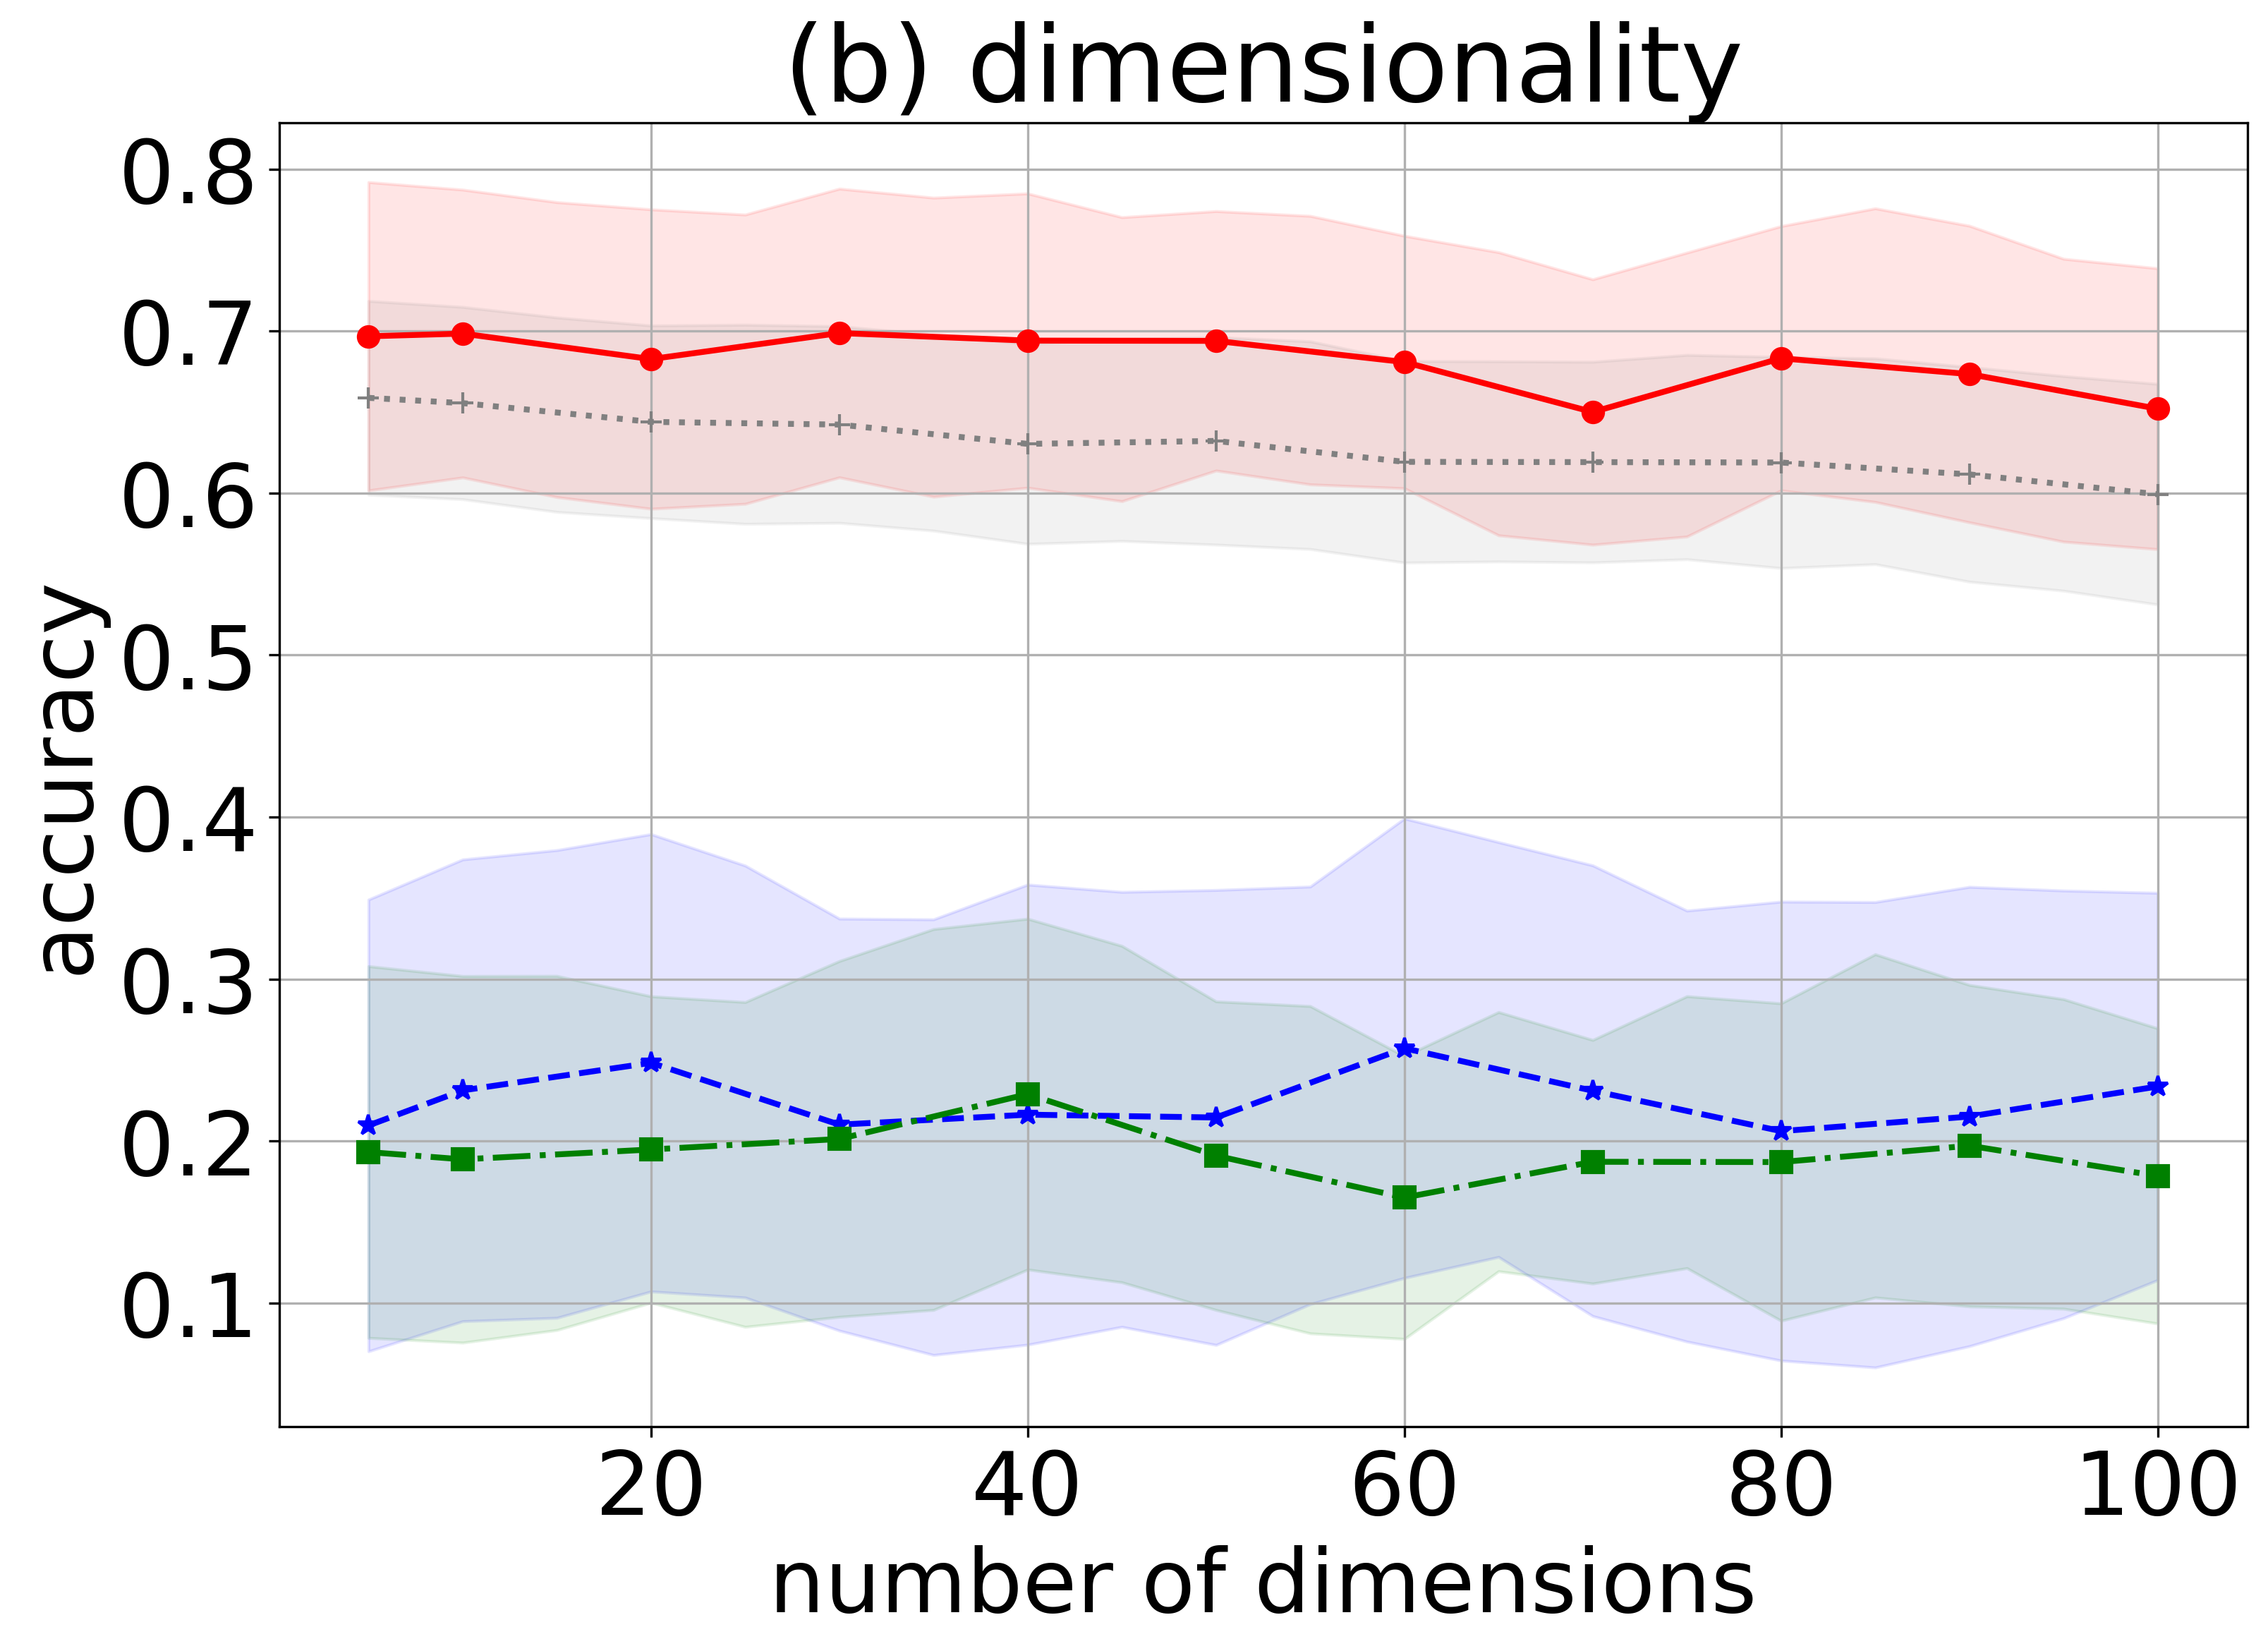

In [10]:
#@title Dimensionality
log_paths = [
    "logs/log/dimensionality/240525_010645.json",
    "logs/log/dimensionality/240525_001446.json",
    "logs/log/dimensionality/240524_223944.json",
    "logs/log/dimensionality/240524_214315.json",
    "logs/log/dimensionality/240524_205706.json",
    "logs/log/dimensionality/240524_195223.json",
    "logs/log/dimensionality/240524_182309.json",
    "logs/log/dimensionality/240524_162031.json",
    "logs/log/dimensionality/240524_153518.json",
    "logs/log/dimensionality/240524_144421.json"
]
exp_name = "dimensionality"
records = []
for path in log_paths:
    print(path)
    records.append(Experiment.load(path))
summary = summarize(
    exp_name=exp_name,
    records=records,
    y_axis="accuracy"
)

include_inds = [i for i in range(len(summary[exp_name]["KeypointGW"]["summary"]["delta_acc_mean"])) if i == 0 or i % 2 != 0]

markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'dimension', 'delta_acc'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(summary[exp_name].items()):
    y = moving_average((np.array(record_["summary"][y_axis + "_mean"])).tolist(), window)
    plt.plot(
        np.array(record_[x_axis][0])[include_inds], 
        np.array(y)[include_inds], 
        label=algo_id[algo],
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )
    plt.fill_between(
        record_[x_axis][0],
        y - 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        y + 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        alpha=0.1,
        color=colors[i],
    )

plt.title(f"(b) {exp_name}", fontsize=36)
plt.xlabel("number of dimensions", fontsize=30)
plt.ylabel("accuracy", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.legend(fontsize=16)
plt.grid(True)
plt.show()

logs/log/dimensionality/240525_010645.json
logs/log/dimensionality/240525_001446.json
logs/log/dimensionality/240524_223944.json
logs/log/dimensionality/240524_214315.json
logs/log/dimensionality/240524_205706.json
logs/log/dimensionality/240524_195223.json
logs/log/dimensionality/240524_182309.json
logs/log/dimensionality/240524_162031.json
logs/log/dimensionality/240524_153518.json
logs/log/dimensionality/240524_144421.json


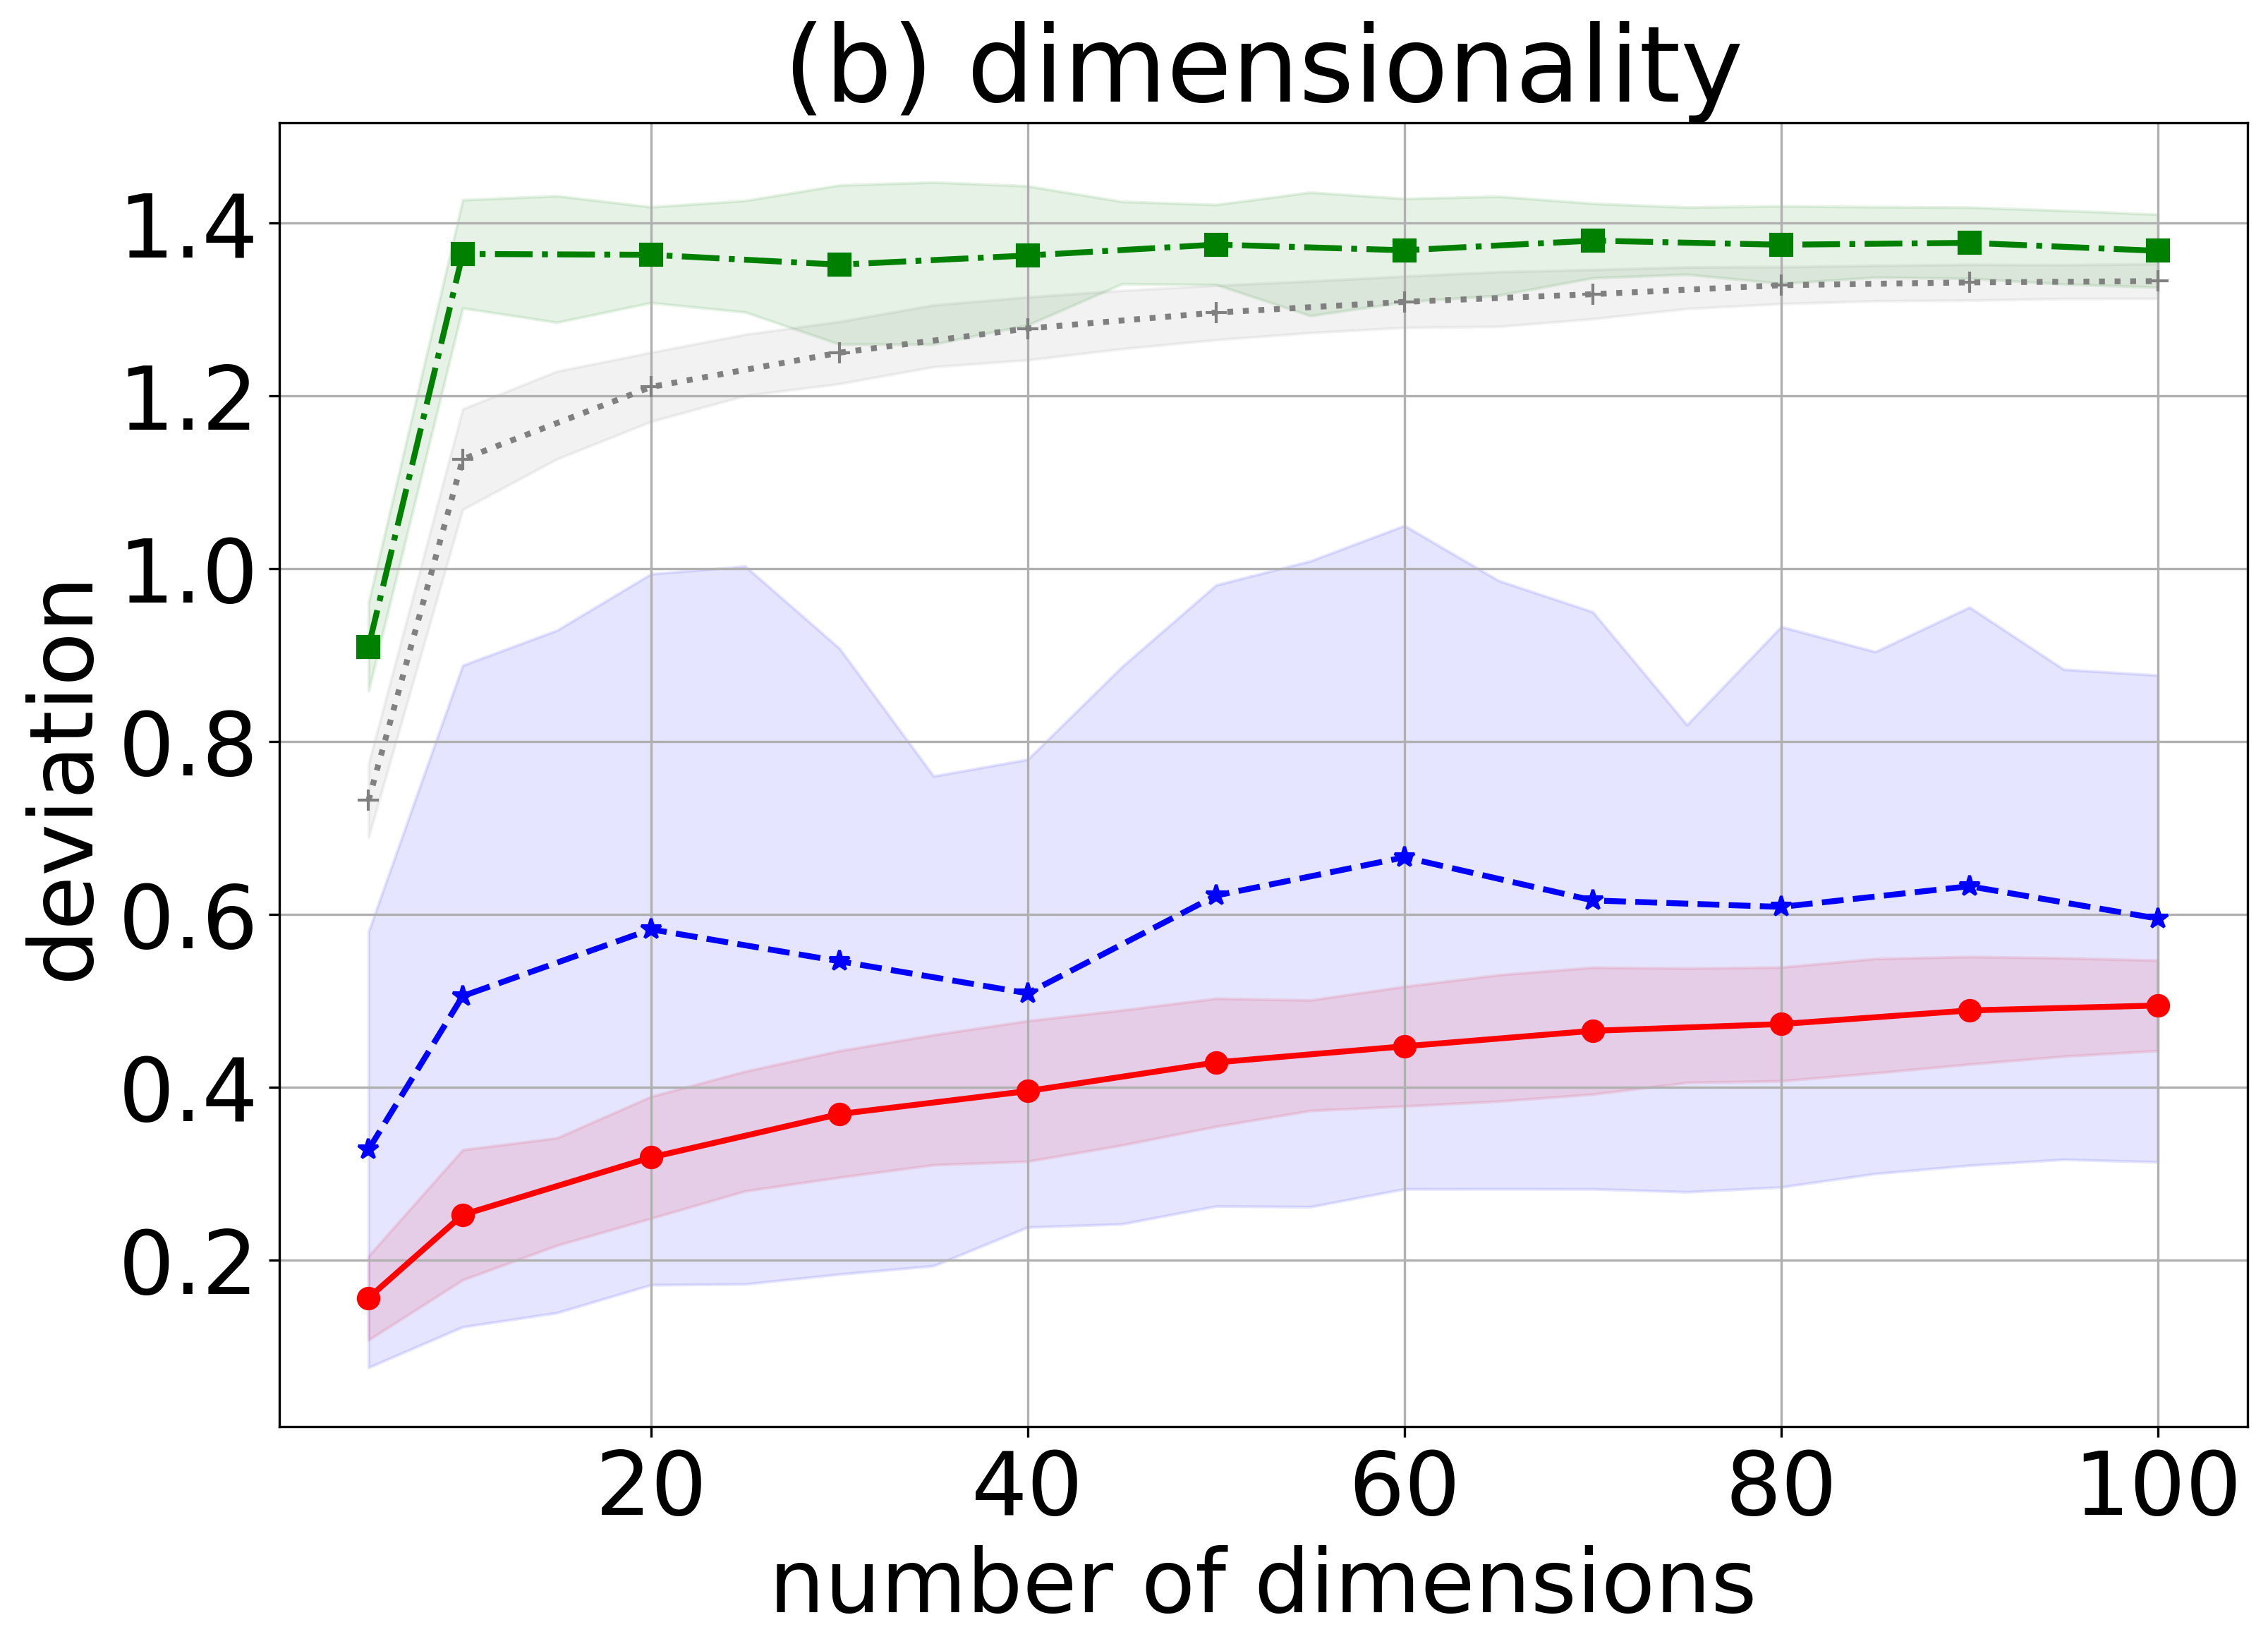

In [12]:
#@title Dimensionality
log_paths = [
    "logs/log/dimensionality/240525_010645.json",
    "logs/log/dimensionality/240525_001446.json",
    "logs/log/dimensionality/240524_223944.json",
    "logs/log/dimensionality/240524_214315.json",
    "logs/log/dimensionality/240524_205706.json",
    "logs/log/dimensionality/240524_195223.json",
    "logs/log/dimensionality/240524_182309.json",
    "logs/log/dimensionality/240524_162031.json",
    "logs/log/dimensionality/240524_153518.json",
    "logs/log/dimensionality/240524_144421.json"
]
exp_name = "dimensionality"
records = []
for path in log_paths:
    print(path)
    records.append(Experiment.load(path))
summary = summarize(
    exp_name=exp_name,
    records=records,
    y_axis="deviation"
)
include_inds = [i for i in range(len(summary[exp_name]["KeypointGW"]["summary"]["delta_acc_mean"])) if i == 0 or i % 2 != 0]

markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'dimension', 'delta_acc'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(summary[exp_name].items()):
    y = moving_average((np.array(record_["summary"][y_axis + "_mean"])).tolist(), window)
    plt.plot(
        np.array(record_[x_axis][0])[include_inds], 
        np.array(y)[include_inds], 
        label=algo_id[algo],
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )
    plt.fill_between(
        record_[x_axis][0],
        y - 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        y + 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        alpha=0.1,
        color=colors[i],
    )

plt.title(f"(b) {exp_name}", fontsize=36)
plt.xlabel("number of dimensions", fontsize=30)
plt.ylabel("deviation", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.legend(fontsize=16)
plt.grid(True)
plt.show()

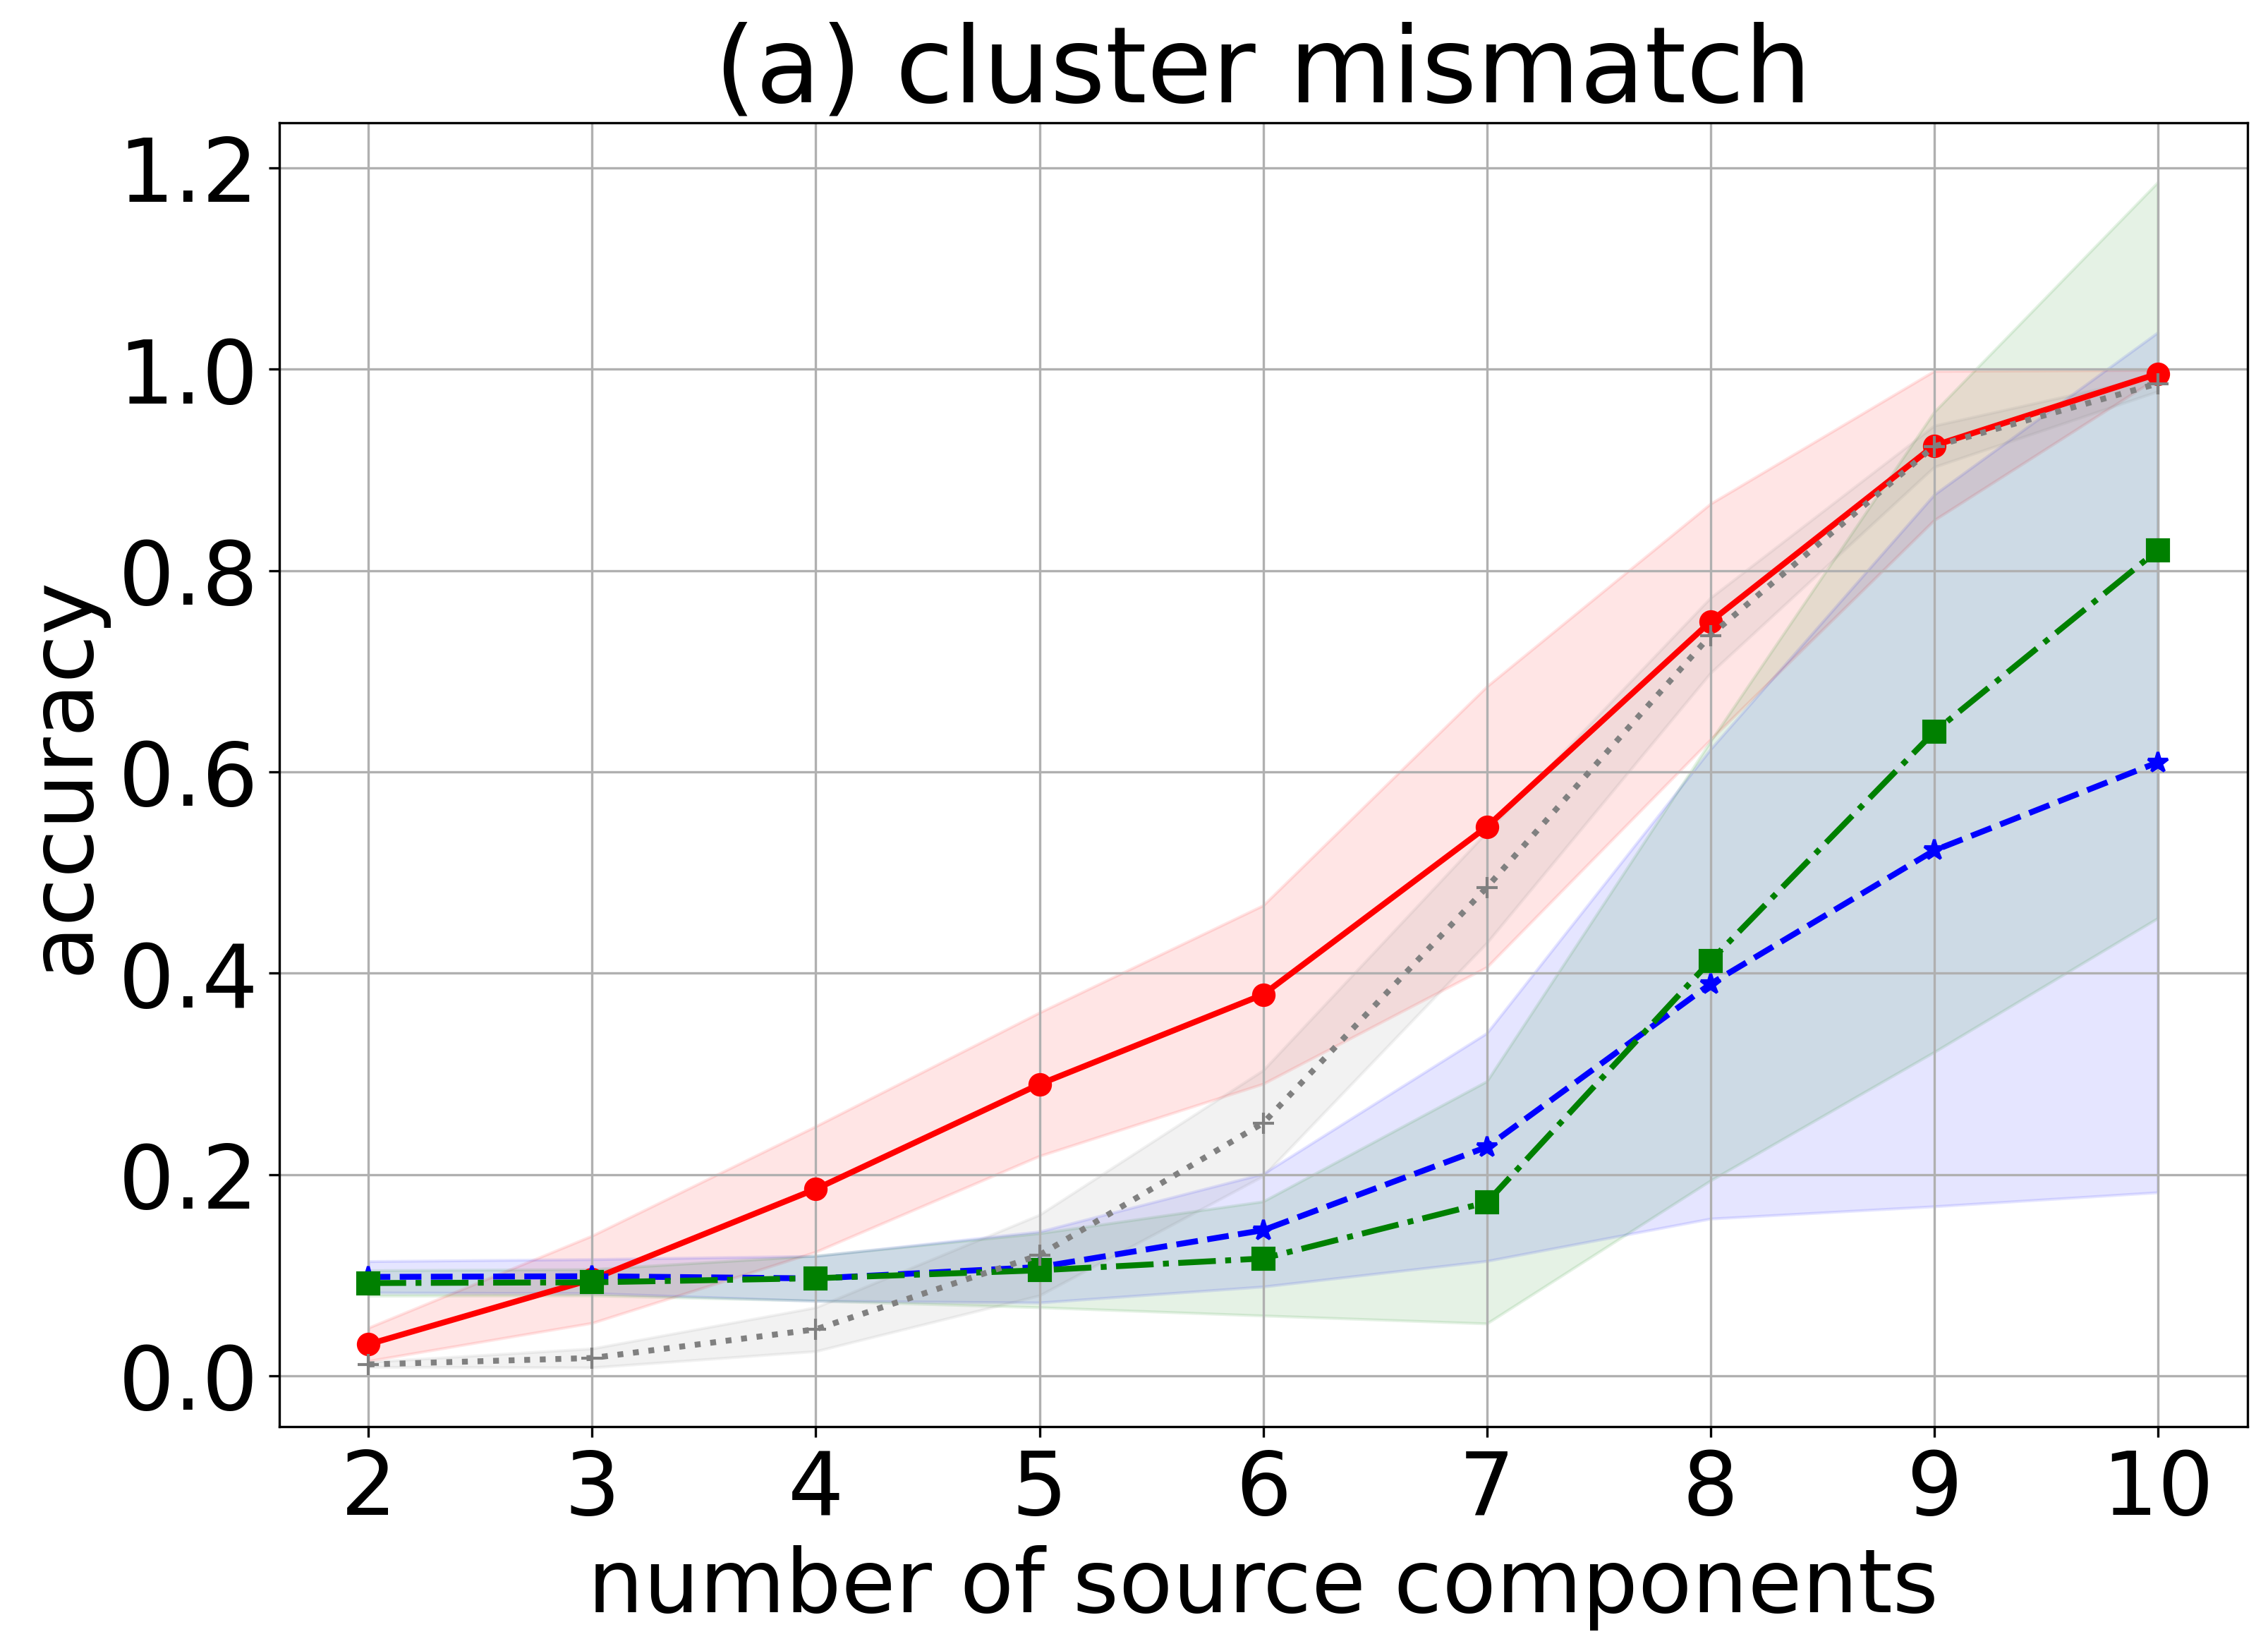

In [13]:
#@title Cluster mismatch
log_paths = [
    "logs/log/cluster_mismatch/240525_013239.json",
    "logs/log/cluster_mismatch/240525_004531.json",
    "logs/log/cluster_mismatch/240524_225921.json",
    "logs/log/cluster_mismatch/240524_221342.json",
    "logs/log/cluster_mismatch/240524_211955.json",
    "logs/log/cluster_mismatch/240524_202312.json",
    "logs/log/cluster_mismatch/240524_185101.json",
    "logs/log/cluster_mismatch/240524_193854.json",
    "logs/log/cluster_mismatch/240524_164931.json",
    "logs/log/cluster_mismatch/240524_160023.json",
    "logs/log/cluster_mismatch/240524_151114.json",
    "logs/log/cluster_mismatch/240524_140552.json",
]
exp_name = "cluster_mismatch"
records = []
for path in log_paths:
    records.append(Experiment.load(path))
summary = summarize(
    exp_name=exp_name,
    records=records,
    y_axis="accuracy"
)
include_inds = [i for i in range(len(summary[exp_name]["KeypointGW"]["summary"]["delta_acc_mean"]))]

markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'cluster', 'delta_acc'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(summary[exp_name].items()):
    y = moving_average((np.array(record_["summary"][y_axis + "_mean"])).tolist(), window)
    plt.plot(
        np.array(record_[x_axis][0])[include_inds], 
        np.array(y)[include_inds], 
        label=algo_id[algo],
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )
    plt.fill_between(
        record_[x_axis][0],
        y - 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        y + 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        alpha=0.1,
        color=colors[i],
    )

plt.title("(a) cluster mismatch", fontsize=36)
plt.xlabel("number of source components", fontsize=30)
plt.ylabel("accuracy", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.show()

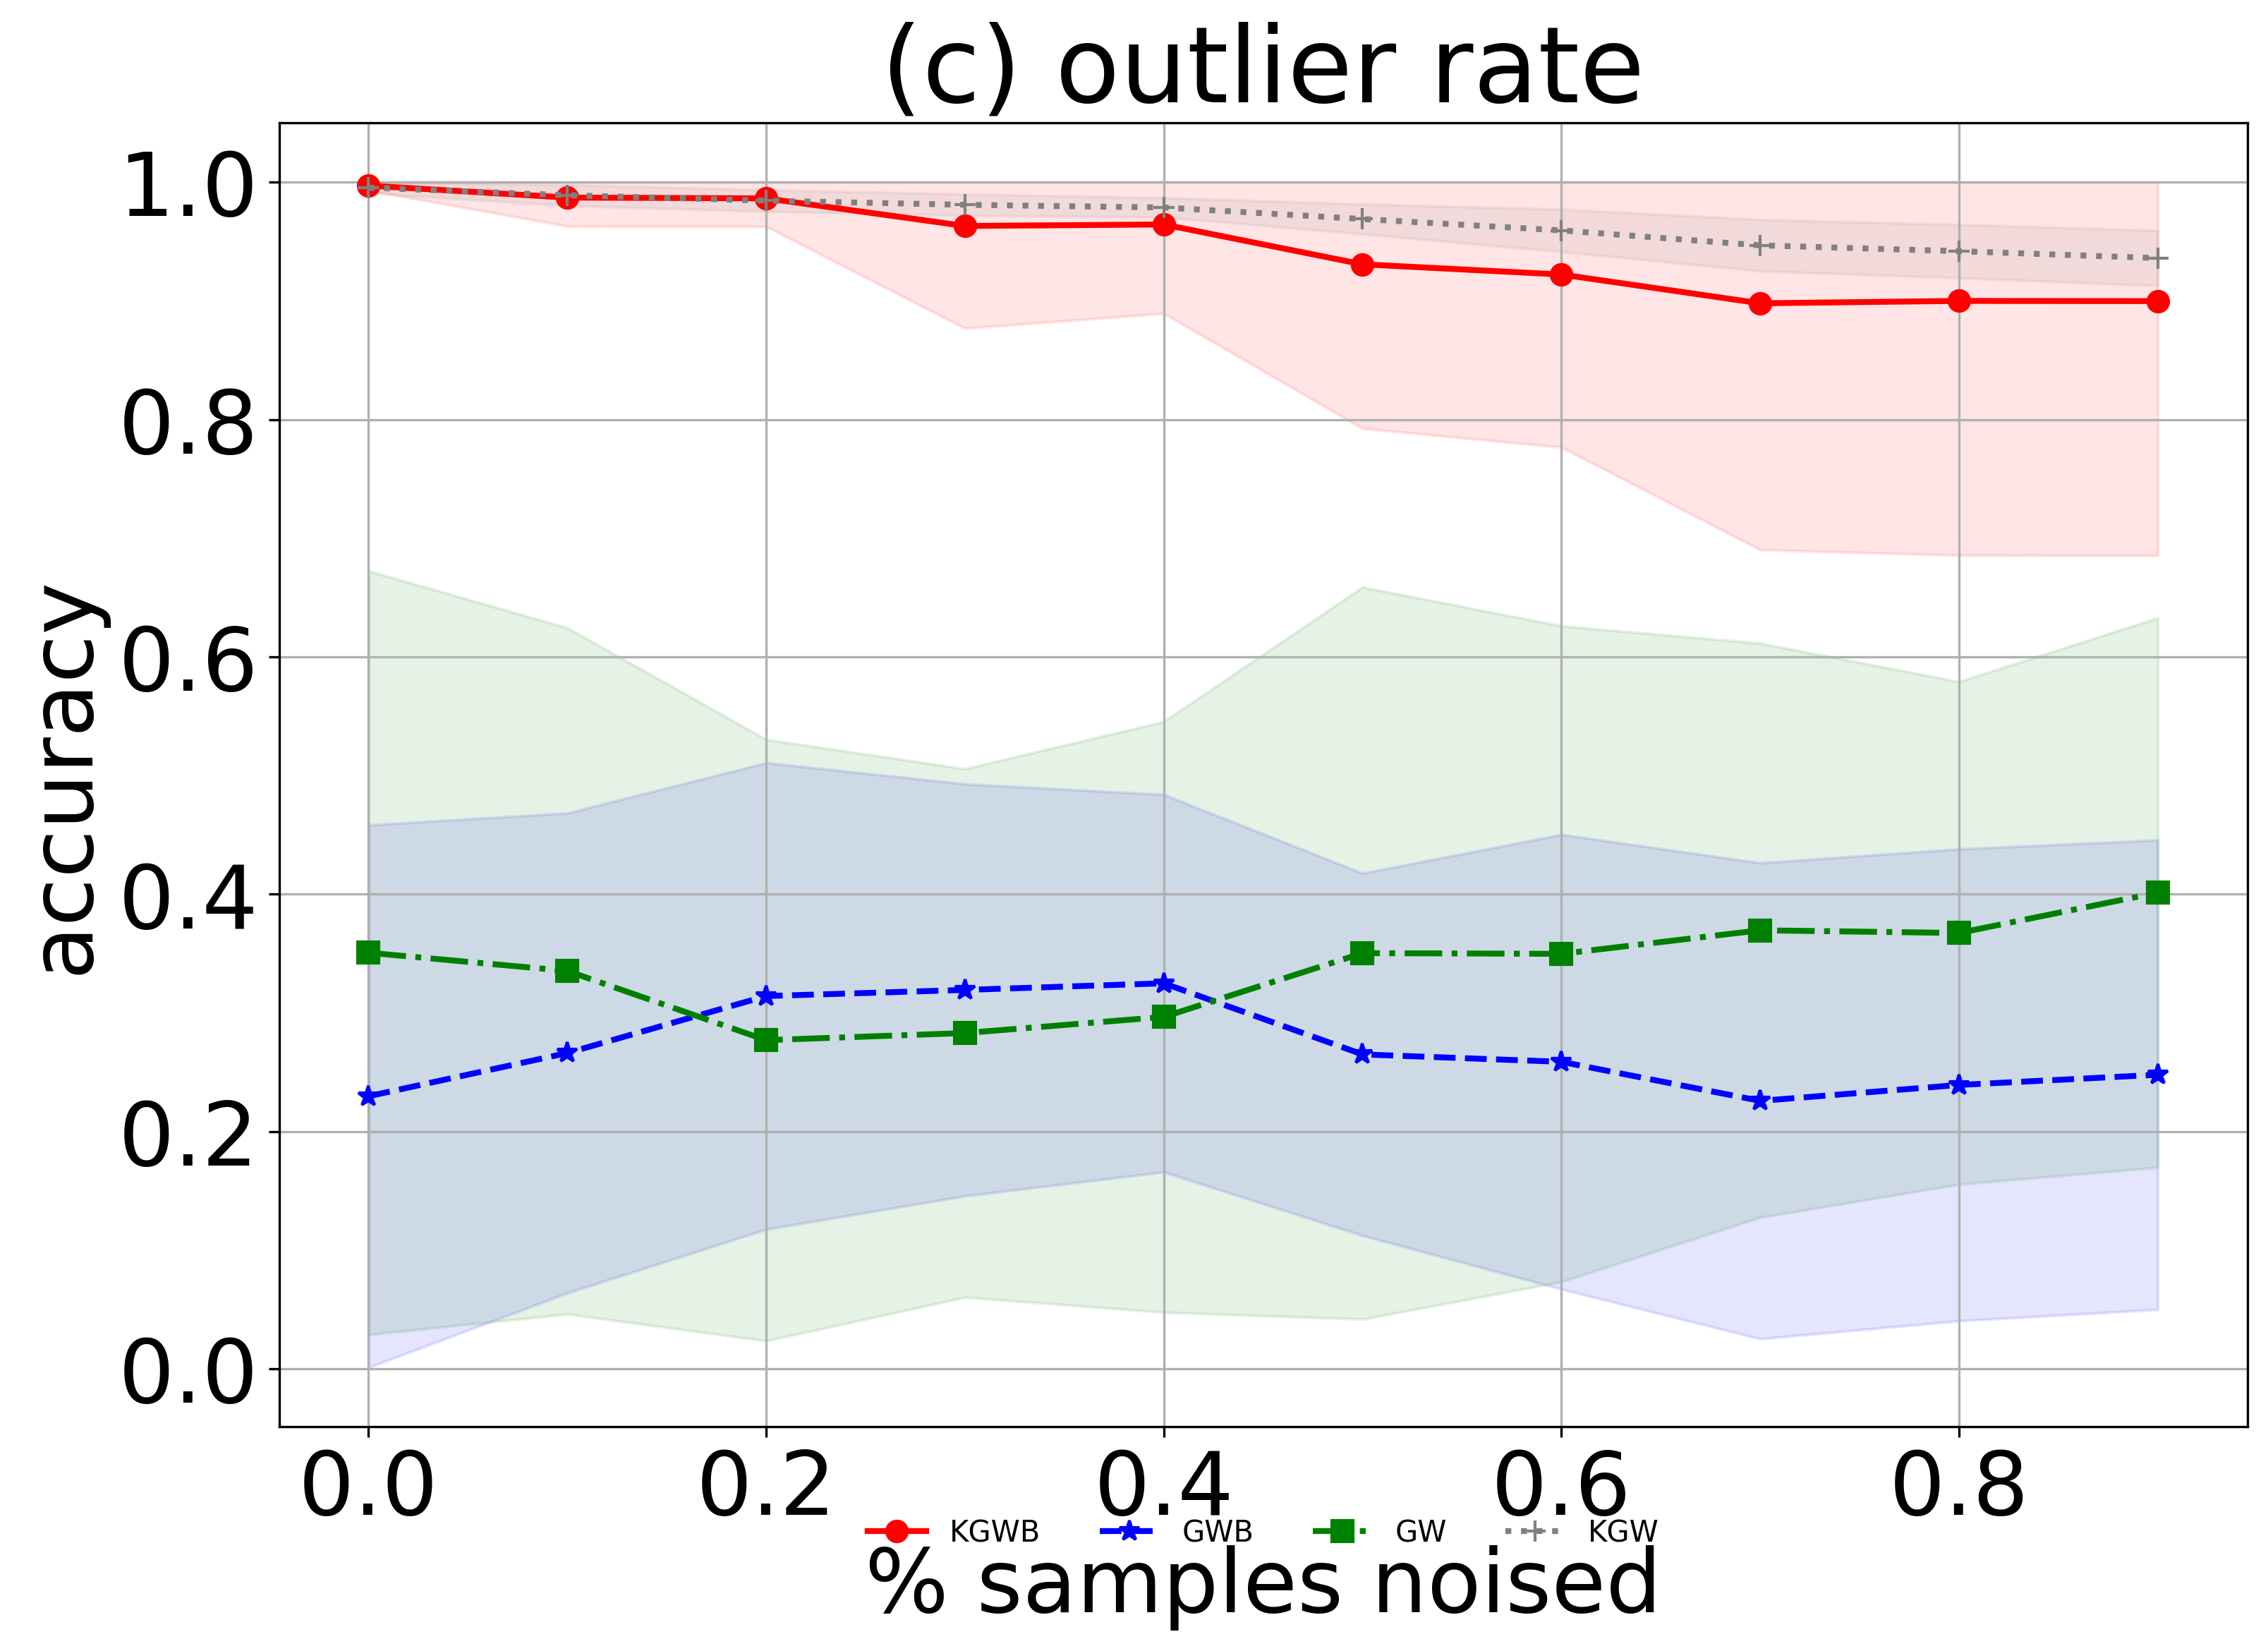

In [16]:
#@title Outlier rate
log_paths = [
    "logs/log/outlier_rate/240525_012756.json",
    "logs/log/outlier_rate/240525_003317.json",
    "logs/log/outlier_rate/240524_225456.json",
    "logs/log/outlier_rate/240524_220156.json",
    "logs/log/outlier_rate/240524_211428.json",
    "logs/log/outlier_rate/240524_201019.json",
    "logs/log/outlier_rate/240524_193430.json",
    "logs/log/outlier_rate/240524_164426.json",
    "logs/log/outlier_rate/240524_155556.json",
    "logs/log/outlier_rate/240524_150110.json"
]
exp_name = "outlier_rate"
records = []
for path in log_paths:
    records.append(Experiment.load(path))
summary = summarize(
    exp_name=exp_name,
    records=records,
    y_axis="accuracy"
)
include_inds = [i for i in range(len(summary[exp_name]["KeypointGW"]["summary"]["delta_acc_mean"]))]

markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'ratio', 'delta_acc'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(summary[exp_name].items()):
    y = moving_average((np.array(record_["summary"][y_axis + "_mean"])).tolist(), window)
    plt.plot(
        np.array(record_[x_axis][0])[include_inds], 
        np.array(y)[include_inds], 
        label=algo_id[algo],
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )
    plt.fill_between(
        record_[x_axis][0],
        y - 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        np.clip(y + 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window), a_min=None, a_max=1.0),
        alpha=0.1,
        color=colors[i],
    )

plt.title("(c) outlier rate", fontsize=36)
plt.xlabel("% samples noised", fontsize=30)
plt.ylabel("accuracy", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False, ncol=4)
#plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.show()

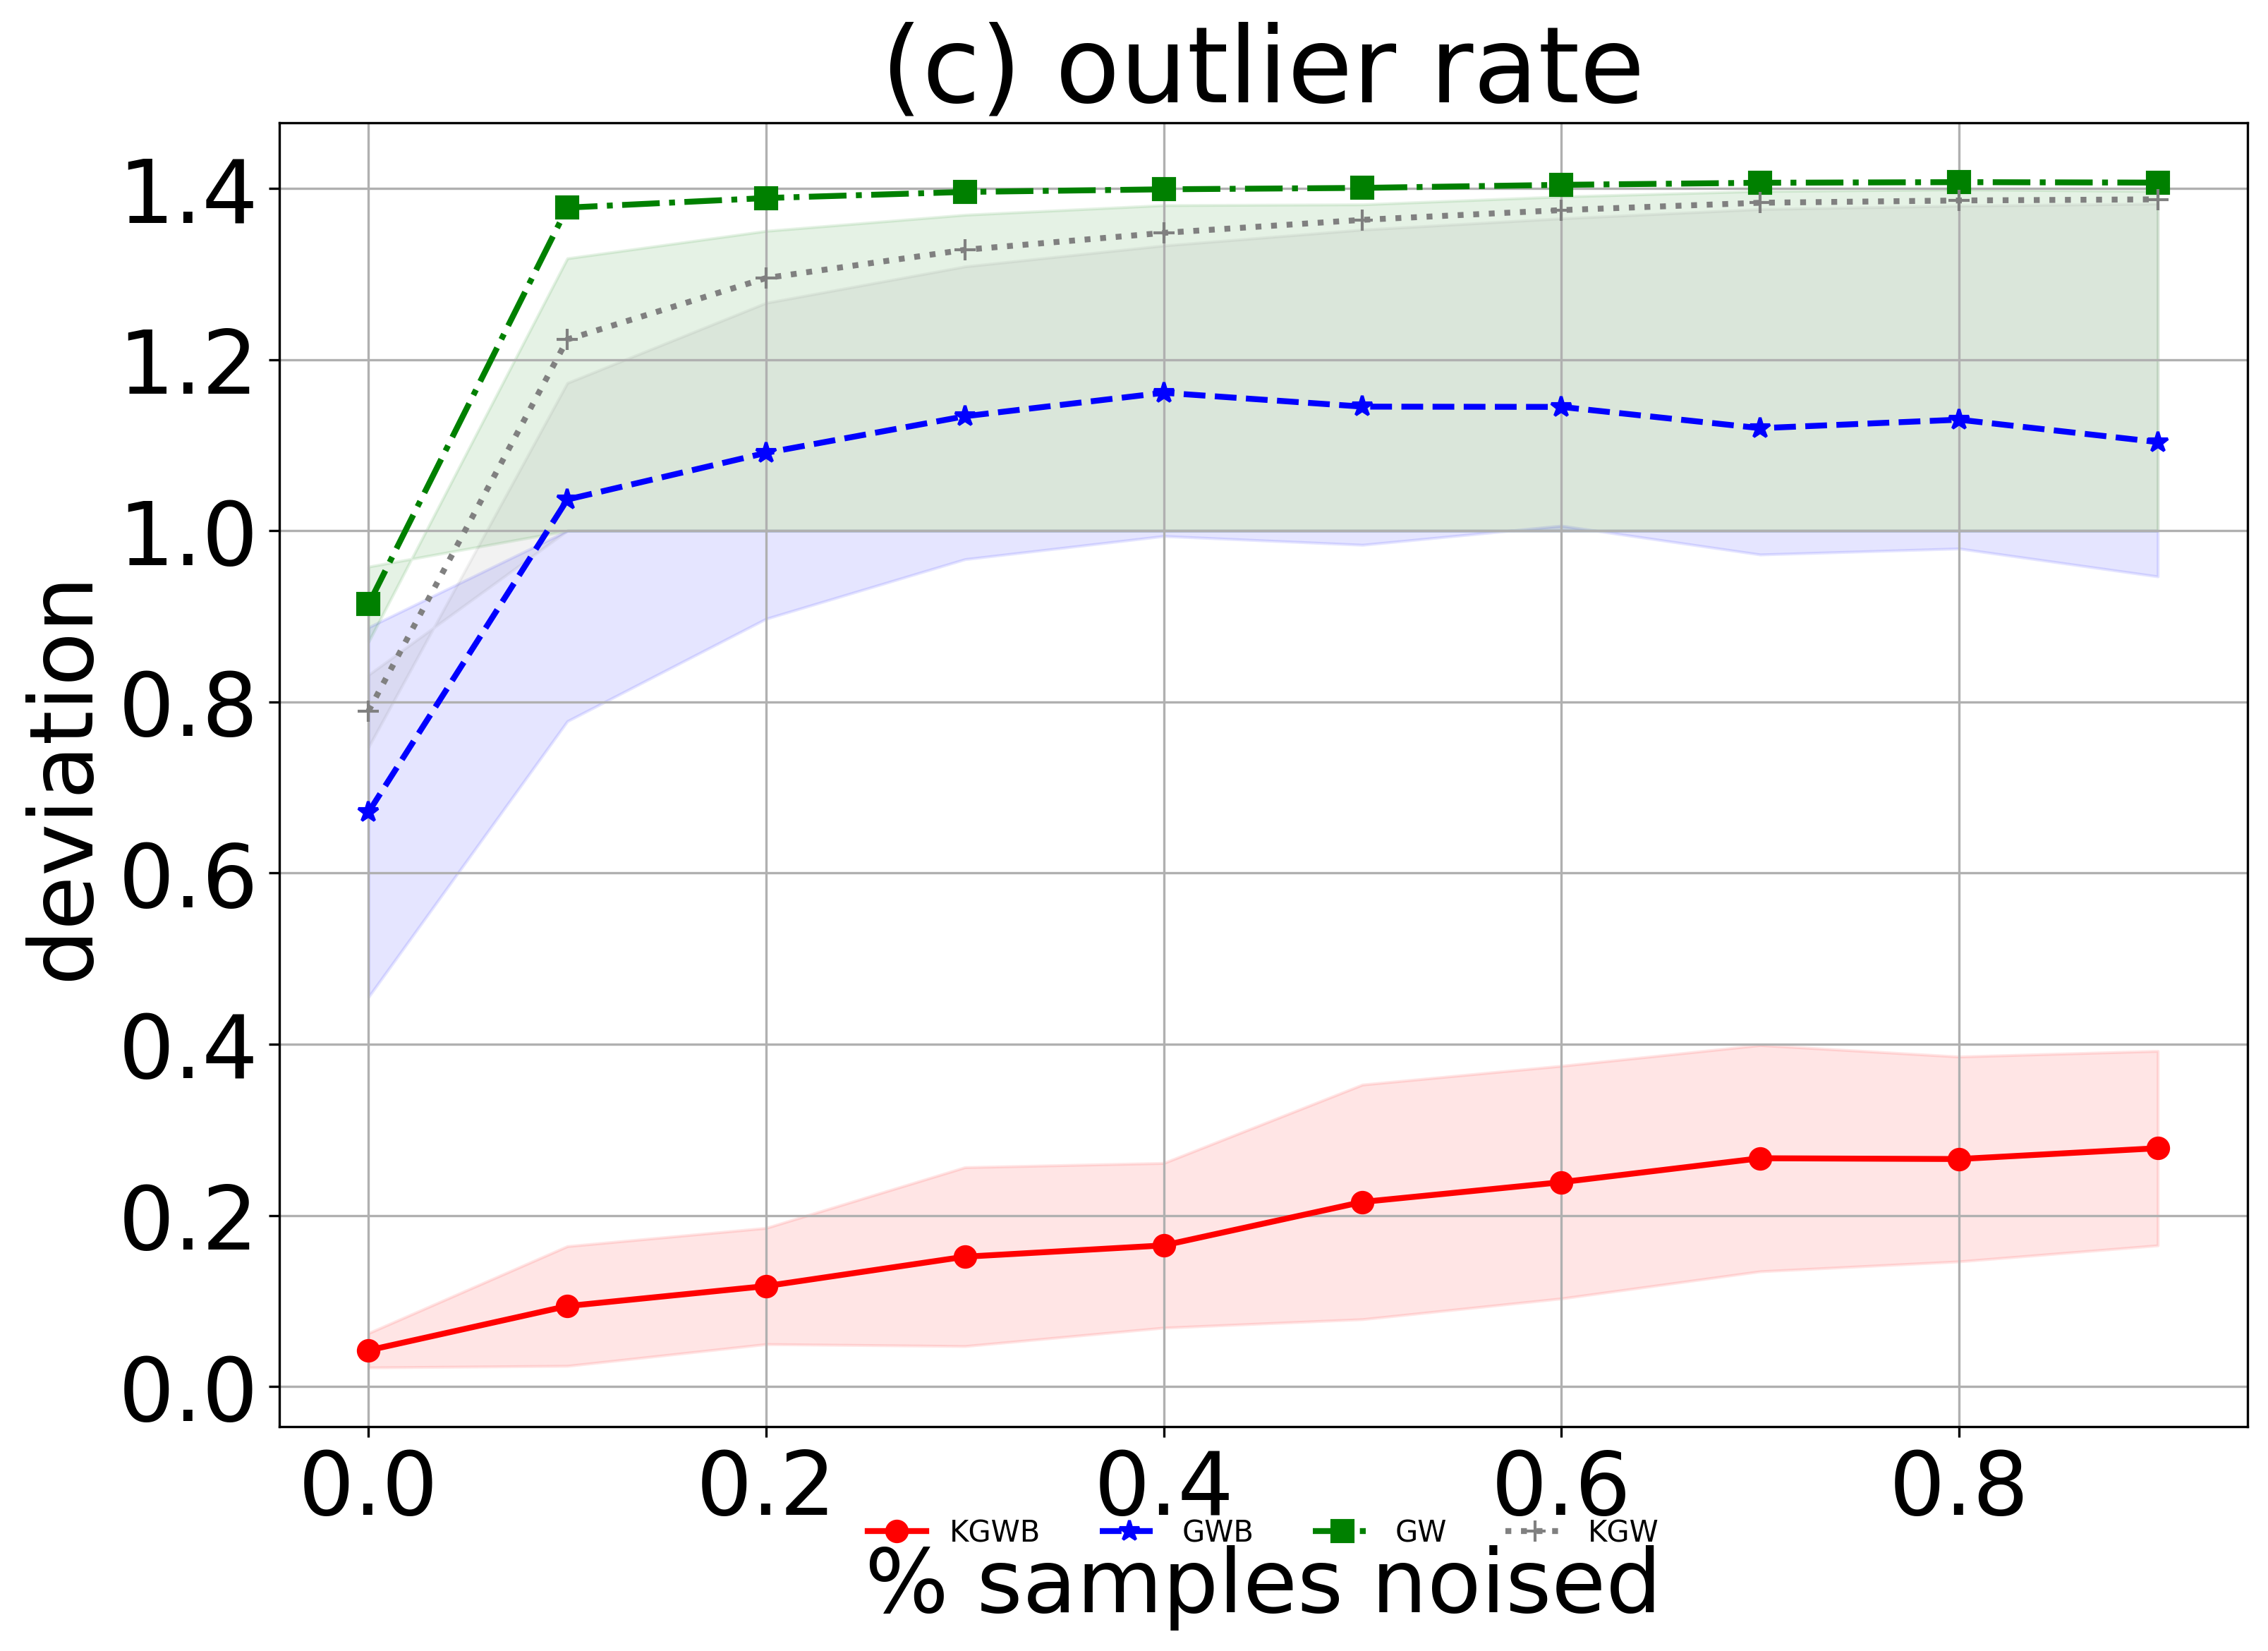

In [17]:
#@title Outlier rate
log_paths = [
    "logs/log/outlier_rate/240525_012756.json",
    "logs/log/outlier_rate/240525_003317.json",
    "logs/log/outlier_rate/240524_225456.json",
    "logs/log/outlier_rate/240524_220156.json",
    "logs/log/outlier_rate/240524_211428.json",
    "logs/log/outlier_rate/240524_201019.json",
    "logs/log/outlier_rate/240524_193430.json",
    "logs/log/outlier_rate/240524_164426.json",
    "logs/log/outlier_rate/240524_155556.json",
    "logs/log/outlier_rate/240524_150110.json"
]
exp_name = "outlier_rate"
records = []
for path in log_paths:
    records.append(Experiment.load(path))
summary = summarize(
    exp_name=exp_name,
    records=records,
    y_axis="deviation"
)
include_inds = [i for i in range(len(summary[exp_name]["KeypointGW"]["summary"]["delta_acc_mean"]))]

markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'ratio', 'delta_acc'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(summary[exp_name].items()):
    y = moving_average((np.array(record_["summary"][y_axis + "_mean"])).tolist(), window)
    plt.plot(
        np.array(record_[x_axis][0])[include_inds], 
        np.array(y)[include_inds], 
        label=algo_id[algo],
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )
    plt.fill_between(
        record_[x_axis][0],
        y - 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window),
        np.clip(y + 1 * moving_average((np.array(record_["summary"][y_axis + "_std"])).tolist(), window), a_min=None, a_max=1.0),
        alpha=0.1,
        color=colors[i],
    )

plt.title("(c) outlier rate", fontsize=36)
plt.xlabel("% samples noised", fontsize=30)
plt.ylabel("deviation", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False, ncol=4)
#plt.legend(fontsize=16, loc="lower right")
plt.grid(True)
plt.show()